## Laboratorio #6  – Análisis de tráfico de red

### Objetivos
Aplicar los conocimientos sobre redes de computadoras en el análisis estadístico de tráfico de 
red, para detectar anomalías en el comportamiento de la red. 

### Desarrollo 
Para este ejercicio se utilizará el archivo analisis_paquetes.pcap, disponible en CANVAS. Trabaje el laboratorio en un jupyter notebook.

In [1]:
from scapy.all import *

In [11]:
from scapy.all import *
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scapy.all import *
print(conf.ifaces)

Source   Index  Name                                         MAC                IPv4             IPv6                     
libpcap  1      Software Loopback Interface 1                00:00:00:00:00:00  127.0.0.1        ::1                      
libpcap  11     Microsoft Wi-Fi Direct Virtual Adapter #7    Intel:8c:a2:ae     169.254.107.82   fe80::2ba3:9966:f591:a48e
libpcap  15     Bluetooth Device (Personal Area Network) #5  Intel:8c:a2:b1     169.254.207.131  fe80::c807:9c11:7b8a:bb28
libpcap  17     Realtek PCIe GbE Family Controller           HP:13:27:90        169.254.153.127  fe80::f81c:dbc0:1781:e53f
libpcap  20     WAN Miniport (IPv6)                                                                                       
libpcap  24     WAN Miniport (IP)                                                                                         
libpcap  26     Kaspersky VPN                                                   169.254.212.67   fe80::efb0:a094:b907:f956
libpcap  32     

In [ ]:
iface_correcta = "Intel(R) Wi-Fi 6 AX201 160MHz"

In [ ]:
paquetes = sniff(count=25)  

In [ ]:
from scapy.all import *
conf.use_pcap = True  # Fuerza el uso de libpcap/npcap
print(conf.use_pcap) 

True


In [7]:
print("Tipo de variable:", type(paquetes))  
print("Longitud:", len(paquetes))
print("\nContenido del primer paquete:")
print(paquetes[0].show())  # Muestra detalles del primer paquete
print("\n5 paquetes sample:")
print(paquetes[:5])


Tipo de variable: <class 'scapy.plist.PacketList'>
Longitud: 25

Contenido del primer paquete:
###[ Ethernet ]###
  dst       = 01:00:5e:00:00:fb
  src       = 9c:3e:53:89:a5:fd
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 212
     id        = 51508
     flags     = 
     frag      = 0
     ttl       = 255
     proto     = udp
     chksum    = 0xf530
     src       = 10.100.17.84
     dst       = 224.0.0.251
     \options   \
###[ UDP ]###
        sport     = 5353
        dport     = 5353
        len       = 192
        chksum    = 0x3534
###[ DNS ]###
           id        = 0
           qr        = 1
           opcode    = QUERY
           aa        = 1
           tc        = 0
           rd        = 0
           ra        = 0
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 0
           ancount   = 1
           nscount   = 0
           arcount   = 

Parte 4 del laboratorio

In [ ]:
# archivo .pcap
paquetes_pcap = rdpcap("analisis_paquetes.pcap")

In [ ]:
# Convertir a DataFrame
filas = []
for pkt in paquetes_pcap:
    if pkt.haslayer(IP):
        filas.append({
            "Src Address": pkt[IP].src,
            "Dst Address": pkt[IP].dst,
            "Src Port": pkt.sport if pkt.haslayer(TCP) or pkt.haslayer(UDP) else None,
            "Dst Port": pkt.dport if pkt.haslayer(TCP) or pkt.haslayer(UDP) else None,
            "Payload Length": len(pkt.payload)
        })



In [10]:
df = pd.DataFrame(filas)
print("\nPrimeras 5 filas:")
print(df.head())


Primeras 5 filas:
   Src Address  Dst Address  Src Port  Dst Port  Payload Length
0   10.1.10.53  84.54.22.33        53        53             961
1  84.54.22.33   10.1.10.53        53        53              84
2   10.1.10.53  84.54.22.33        53        53             975
3  84.54.22.33   10.1.10.53        53        53              84
4   10.1.10.53  84.54.22.33        53        53            1012


## Gráficas

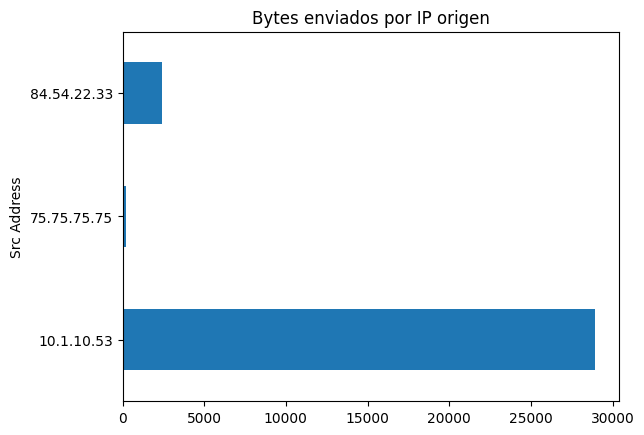

In [ ]:
# Gráfica de IPs origen vs bytes enviados 
df.groupby("Src Address")["Payload Length"].sum().plot(kind="barh")
plt.title("Bytes enviados por IP origen")
plt.show()

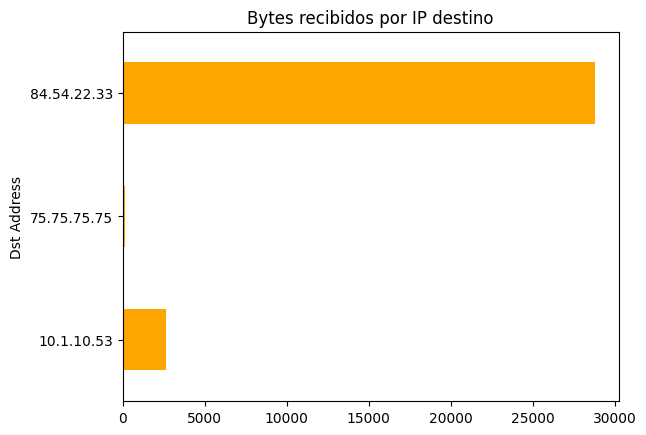

In [17]:
# Gráfica de IPs destino vs bytes recibidos
df.groupby("Dst Address")["Payload Length"].sum().plot(kind="barh", color='orange')
plt.title("Bytes recibidos por IP destino")
plt.show()

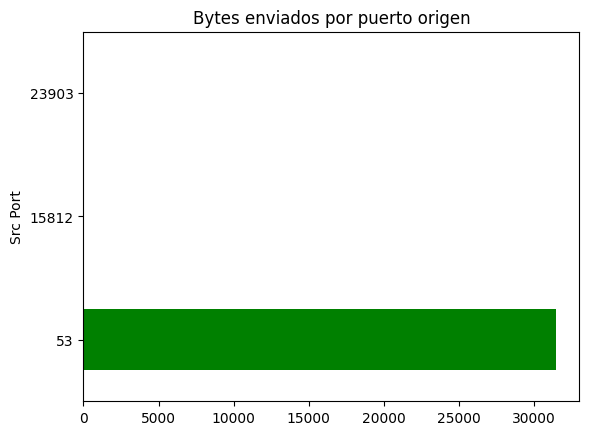

In [18]:
# Gráfica de puertos origen vs bytes enviados
df_ports = df.dropna(subset=["Src Port"])  # Eliminar filas sin puerto origen
df_ports.groupby("Src Port")["Payload Length"].sum().plot(kind="barh", color='green')
plt.title("Bytes enviados por puerto origen")
plt.show()


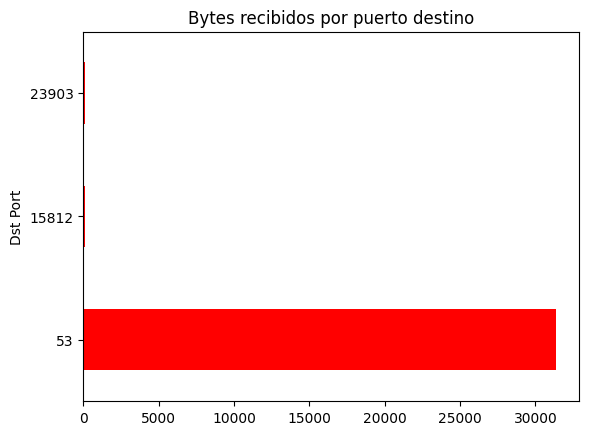

In [19]:
# Gráfica de puertos destino vs bytes recibidos
df_ports = df.dropna(subset=["Dst Port"])
df_ports.groupby("Dst Port")["Payload Length"].sum().plot(kind="barh", color='red')
plt.title("Bytes recibidos por puerto destino")
plt.show()

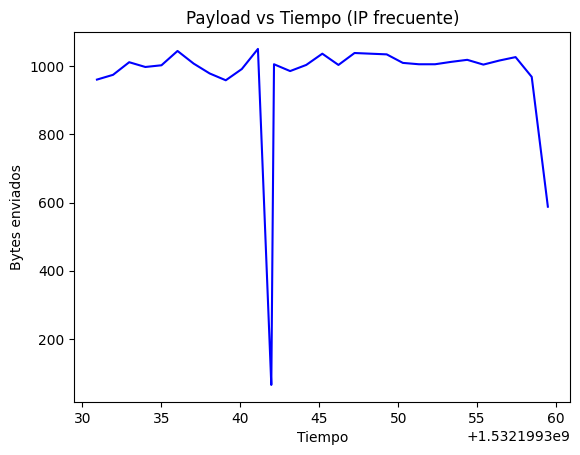

In [20]:
# Gráfica de tiempo vs payload para IP frecuente
# Extraer tiempos de los paquetes (ejemplo con scapy)
times = [pkt.time for pkt in paquetes_pcap if pkt.haslayer(IP) and pkt[IP].src == ip_frecuente]
payloads = [len(pkt.payload) for pkt in paquetes_pcap if pkt.haslayer(IP) and pkt[IP].src == ip_frecuente]

plt.plot(times, payloads, 'b-')
plt.title("Payload vs Tiempo (IP frecuente)")
plt.xlabel("Tiempo")
plt.ylabel("Bytes enviados")
plt.show()


In [21]:
# ¿Desde qué puertos origen se comunica?
puertos_origen = df[df["Src Address"] == ip_frecuente]["Src Port"].value_counts()
print("Puertos origen usados por la IP frecuente:\n", puertos_origen)

Puertos origen usados por la IP frecuente:
 53       29
15812     1
23903     1
Name: Src Port, dtype: int64


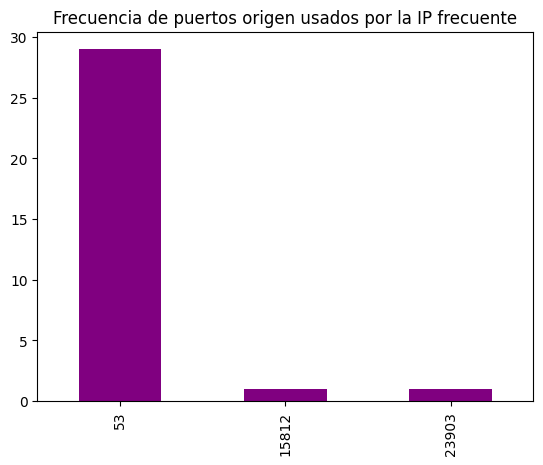

In [22]:
puertos_origen.plot(kind='bar', color='purple')
plt.title("Frecuencia de puertos origen usados por la IP frecuente")
plt.show()

Investigación del payload 


In [13]:
# IP origen más frecuente
ip_frecuente = df["Src Address"].mode()[0]
print("IP más frecuente:", ip_frecuente)



IP más frecuente: 10.1.10.53


In [15]:
puertos_origen = df[df["Src Address"] == ip_frecuente]["Src Port"].value_counts()
print("Puertos origen usados por la IP frecuente:", puertos_origen)

Puertos origen usados por la IP frecuente: 53       29
15812     1
23903     1
Name: Src Port, dtype: int64


In [ ]:
# Filtrar tráfico de esa IP
df_sospechoso = df[df["Src Address"] == ip_frecuente]
ip_sospechosa = df_sospechoso.groupby("Dst Address")["Payload Length"].sum().idxmax()
print("IP sospechosa (más bytes intercambiados):",  ip_sospechosa)

IP sospechosa (más bytes intercambiados): 84.54.22.33


In [16]:
# Extraer payloads de la conversación sospechosa
payloads = []
for pkt in paquetes_pcap:
    if pkt.haslayer(IP) and pkt[IP].src == ip_frecuente and pkt[IP].dst == ip_sospechosa:
        if pkt.haslayer(Raw):
            payloads.append(pkt[Raw].load)

print("Primeros bytes del primer payload:", payloads[0][:20])  # Muestra los primeros 20 bytes

Primeros bytes del primer payload: b'\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00'
